# 예측을 위한 모델 만들기

## 1. Scikit-learn을 이용한 모델

In [5]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
path = "../datas/SSMA_Cleaned.csv"
df = pd.read_csv(path)

In [7]:
# 전처리한 데이터 불러오기
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    673 non-null    int64  
 1   Age                           673 non-null    int64  
 2   Gender                        673 non-null    int64  
 3   Academic_Level                673 non-null    int64  
 4   Avg_Daily_Usage_Hours         673 non-null    float64
 5   Affects_Academic_Performance  673 non-null    int64  
 6   Sleep_Hours_Per_Night         673 non-null    float64
 7   Mental_Health_Score           673 non-null    int64  
 8   is_Relationship               673 non-null    bool   
 9   Conflicts_Over_Social_Media   673 non-null    int64  
 10  Addicted_Score                673 non-null    int64  
 11  Most_Used_Platform_Facebook   673 non-null    bool   
 12  Most_Used_Platform_Instagram  673 non-null    bool   
 13  Most_Used_Platfo

In [8]:
df = df.drop('Student_ID', axis=1)

In [9]:
df.columns

Index(['Age', 'Gender', 'Academic_Level', 'Avg_Daily_Usage_Hours',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'is_Relationship', 'Conflicts_Over_Social_Media',
       'Addicted_Score', 'Most_Used_Platform_Facebook',
       'Most_Used_Platform_Instagram', 'Most_Used_Platform_KakaoTalk',
       'Most_Used_Platform_LINE', 'Most_Used_Platform_LinkedIn',
       'Most_Used_Platform_Snapchat', 'Most_Used_Platform_TikTok',
       'Most_Used_Platform_Twitter', 'Most_Used_Platform_VKontakte',
       'Most_Used_Platform_WeChat', 'Most_Used_Platform_WhatsApp',
       'Most_Used_Platform_YouTube'],
      dtype='str')

In [10]:
# 이번에는 
X_train, X_test, y_train, y_test = train_test_split(df.drop('is_Relationship', axis=1), df['is_Relationship'], test_size=0.2, random_state=2026)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((538, 21), (135, 21), (538,), (135,))

In [12]:
X_train.head()

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Most_Used_Platform_Facebook,...,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube
437,21,0,2,3.9,1,8.3,6,3,7,False,...,False,False,False,False,False,False,False,False,False,False
118,19,0,1,4.9,1,4.9,6,3,7,False,...,False,False,False,False,True,False,False,False,False,False
560,21,1,1,6.9,1,6.1,5,4,8,False,...,False,False,False,False,True,False,False,False,False,False
406,20,1,1,3.4,0,8.6,7,2,5,False,...,False,False,False,False,False,False,False,False,False,False
121,21,1,2,4.8,1,4.8,6,3,7,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# 연애 중이냐 아니냐로 나뉜다
y_train.head()

437    False
118    False
560    False
406     True
121     True
Name: is_Relationship, dtype: bool

# Binary Classification

> 이진 분류란? 0과 1 두 개로 나누는 문제!
흑인가 백인가   참인가 거짓인가   연애중인가 솔로인가   토끼인가 거북이인가   
이러한 문제가 이진 분류 문제입니다

## 1. SVC

SVC(Support Vector Classifier)는 서포트 벡터 머신(SVM, Support Vector Machine)을 사용한 분류(Classification) 알고리즘입니다. 사이킷런(sklearn.svm.SVC)에서 제공되며, 이진 분류(Binary Classification)와 다중 클래스 분류(Multi-Class Classification) 문제를 해결할 수 있습니다.

| 서포트 벡터 머신(Support Vector Machine, SVM)

서포트 벡터 머신(SVM)은 두 개 이상의 클래스(Class)를 구분하는 지도 학습(Supervised Learning) 알고리즘입니다. 주로 분류(Classification) 문제를 해결하는 데 사용되며, 일부 경우 회귀(Regression) 문제에도 사용됩니다. SVM의 목표는 두 클래스 간의 경계를 가장 잘 구분하는 최적의 초평면(Hyperplane)을 찾는 것입니다.

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [15]:
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, pred) * 100:0.2f}%")

Accuracy: 51.85%


In [16]:
is_equal = (y_test == pred).value_counts()
acc = is_equal[True]/y_test.size
print(f"Accuracy: {acc * 100:0.2f}%")

# 51.85%, 아무래도 클래스가 많아서 안 되는 것 같다. 데이터 전처리 문제일 가능성이 높다

Accuracy: 51.85%


## 2. RandomForestClassifier

여러 개의 결정 트리(Decision Tree)를 만들어 예측 결과를 종합하는 앙상블 머신러닝 기법으로, 개별 트리의 약점인 과적합을 줄이고 예측 성능을 높이는 알고리즘. 부트스트래핑(중복 허용 샘플링)으로 다양한 데이터를 만들고, 각 트리 학습 시 변수를 무작위로 선택해(랜덤 변수 선택) 다양한 트리들을 생성한 후, 분류는 다수결(최빈값), 회귀는 평균값으로 최종 결정

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

이거 보고 만들어봄

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
forest = RandomForestClassifier(100)
forest.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [19]:
pred = forest.predict(X_test)

In [20]:
def acc_print(y_test, pred):
    is_equal = (y_test == pred).value_counts()
    acc = is_equal[True]/y_test.size
    print(f"Accuracy: {acc * 100:0.2f}%")

In [21]:
acc_print(y_test, pred)
# 훨씬 잚 맞춘다

Accuracy: 85.19%


### 학습한 모델 사용해보기

In [22]:
X_test.columns

Index(['Age', 'Gender', 'Academic_Level', 'Avg_Daily_Usage_Hours',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score',
       'Most_Used_Platform_Facebook', 'Most_Used_Platform_Instagram',
       'Most_Used_Platform_KakaoTalk', 'Most_Used_Platform_LINE',
       'Most_Used_Platform_LinkedIn', 'Most_Used_Platform_Snapchat',
       'Most_Used_Platform_TikTok', 'Most_Used_Platform_Twitter',
       'Most_Used_Platform_VKontakte', 'Most_Used_Platform_WeChat',
       'Most_Used_Platform_WhatsApp', 'Most_Used_Platform_YouTube'],
      dtype='str')

In [23]:
dummi = [23, 1, 2, 7, 1, 5, 7, 3, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
dummi_df = pd.DataFrame([dummi], columns=X_train.columns)
print(dummi_df)

   Age  Gender  Academic_Level  Avg_Daily_Usage_Hours  \
0   23       1               2                      7   

   Affects_Academic_Performance  Sleep_Hours_Per_Night  Mental_Health_Score  \
0                             1                      5                    7   

   Conflicts_Over_Social_Media  Addicted_Score  Most_Used_Platform_Facebook  \
0                            3               7                            0   

   ...  Most_Used_Platform_KakaoTalk  Most_Used_Platform_LINE  \
0  ...                             0                        0   

   Most_Used_Platform_LinkedIn  Most_Used_Platform_Snapchat  \
0                            0                            0   

   Most_Used_Platform_TikTok  Most_Used_Platform_Twitter  \
0                          0                           0   

   Most_Used_Platform_VKontakte  Most_Used_Platform_WeChat  \
0                             0                          0   

   Most_Used_Platform_WhatsApp  Most_Used_Platform_YouTube  
0 

In [24]:
pred = forest.predict(dummi_df)
print(pred) # [True!], 연애 가능~?

# 모델의 예측이 무작정 옳지는 않다

[False]


## 회귀 문제란?

데이터를 토대로 연속적인 값 사이를 예측하는 문제입니다.

## 수면시간 예측하기

소셜 미디어 사용이 실제 수면의 양에 얼마나 악영향을 주는지 수치로 증명해보자

In [25]:
# 이번에는 
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep_Hours_Per_Night', axis=1), df['Sleep_Hours_Per_Night'], test_size=0.2, random_state=2026)

In [26]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [27]:
pred = regressor.predict(X_test)

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. R-squared (결정계수): 1에 가까울수록 모델이 데이터를 잘 설명함 (가장 대중적)
r2 = r2_score(y_test, pred)

# 2. MAE (Mean Absolute Error): 실제 수면 시간과 예측 시간의 평균 차이 (단위: 시간)
mae = mean_absolute_error(y_test, pred)

# 3. RMSE (Root Mean Squared Error): 큰 오차에 더 민감한 지표
rmse = np.sqrt(mean_squared_error(y_test, pred))

print(f"R2 Score (설명력): {r2:.4f}")
print(f"MAE (평균 오차): {mae:.4f} 시간")
print(f"RMSE: {rmse:.4f}")

R2 Score (설명력): 0.8379
MAE (평균 오차): 0.2538 시간
RMSE: 0.4316


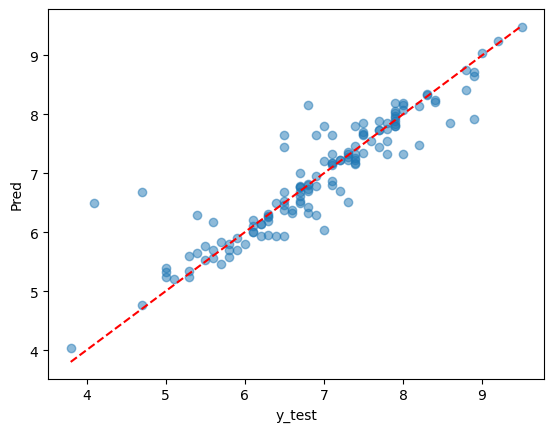

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # 기준선
plt.xlabel('y_test')
plt.ylabel('Pred')
plt.show()

# 음! 예측을 잘하는군

## 더미 데이터로 수면시간 예측 해보기

더미 데이터로 수면 시간이 어느정도일지 예측해보자   

In [31]:
X_test.head(1) # 아 원핫인코딩 진짜...

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Mental_Health_Score,is_Relationship,Conflicts_Over_Social_Media,Addicted_Score,Most_Used_Platform_Facebook,...,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube
494,20,1,1,6.7,1,5,True,4,8,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
X_test.columns

Index(['Age', 'Gender', 'Academic_Level', 'Avg_Daily_Usage_Hours',
       'Affects_Academic_Performance', 'Mental_Health_Score',
       'is_Relationship', 'Conflicts_Over_Social_Media', 'Addicted_Score',
       'Most_Used_Platform_Facebook', 'Most_Used_Platform_Instagram',
       'Most_Used_Platform_KakaoTalk', 'Most_Used_Platform_LINE',
       'Most_Used_Platform_LinkedIn', 'Most_Used_Platform_Snapchat',
       'Most_Used_Platform_TikTok', 'Most_Used_Platform_Twitter',
       'Most_Used_Platform_VKontakte', 'Most_Used_Platform_WeChat',
       'Most_Used_Platform_WhatsApp', 'Most_Used_Platform_YouTube'],
      dtype='str')

In [42]:
dummi = [24, 0, 1, 5.5, 1, 5, 0, 0, 5, 0,0,0,0,0,0,0,0,0,0,0,1] #Most_Used가 12개다

In [43]:
dummi_df = pd.DataFrame([dummi], columns=X_test.columns)

In [45]:
dummi_df

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Mental_Health_Score,is_Relationship,Conflicts_Over_Social_Media,Addicted_Score,Most_Used_Platform_Facebook,...,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube
0,24,0,1,5.5,1,5,0,0,5,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
regressor.predict(dummi_df) # 대충 6.8 시간 잘 것 같다고 한다. 어케 알았지?

array([6.808])

## 테스트를 위한 테스트 class 만들기

In [50]:
import pandas as pd
import numpy as np

class DummyGenerator:
    def __init__(self, reference_df, ohe_groups=None):
        """
        ohe_groups: 원-핫 인코딩된 컬럼들의 리스트를 담은 리스트
        예: [['City_A', 'City_B', 'City_C'], ['Gender_M', 'Gender_F']]
        """
        self.columns = reference_df.columns
        self.min_vals = reference_df.min()
        self.max_vals = reference_df.max()
        self.ohe_groups = ohe_groups if ohe_groups else []
        
        # OHE 그룹에 속한 컬럼들 식별
        self.ohe_columns = [col for group in self.ohe_groups for col in group]
        # 일반 컬럼 (OHE가 아닌 컬럼들)
        self.normal_columns = [col for col in self.columns if col not in self.ohe_columns]

    def generate(self, n=1):
        rows = []
        for _ in range(n):
            row_dict = {}
            
            # 1. 일반 컬럼 처리 (정수/실수 구분)
            for col in self.normal_columns:
                if self.min_vals[col] == 0 and self.max_vals[col] == 1:
                    # 이진 변수(Binary) 처리
                    row_dict[col] = np.random.choice([0, 1])
                else:
                    # 연속형 변수 처리
                    row_dict[col] = np.random.uniform(self.min_vals[col], self.max_vals[col])
            
            # 2. 원-핫 인코딩 그룹 처리
            for group in self.ohe_groups:
                # 그룹 내에서 하나만 선택하여 1로 설정, 나머지는 0
                selected_col = np.random.choice(group)
                for col in group:
                    row_dict[col] = 1 if col == selected_col else 0
            
            rows.append(row_dict)
            
        return pd.DataFrame(rows, columns=self.columns)

# --- 사용 예시 ---

# 1. 원-핫 인코딩 그룹 정의
# X_test 내의 컬럼명을 확인하여 그룹화합니다.
my_ohe_groups = [['Most_Used_Platform_Facebook', 'Most_Used_Platform_Instagram',
       'Most_Used_Platform_KakaoTalk', 'Most_Used_Platform_LINE',
       'Most_Used_Platform_LinkedIn', 'Most_Used_Platform_Snapchat',
       'Most_Used_Platform_TikTok', 'Most_Used_Platform_Twitter',
       'Most_Used_Platform_VKontakte', 'Most_Used_Platform_WeChat',
       'Most_Used_Platform_WhatsApp', 'Most_Used_Platform_YouTube']]

# 2. 생성자 초기화
generator = DummyGenerator(X_test, ohe_groups=my_ohe_groups)

# 3. 데이터 생성
dummy_df = generator.generate(5)
display(dummy_df)

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Mental_Health_Score,is_Relationship,Conflicts_Over_Social_Media,Addicted_Score,Most_Used_Platform_Facebook,...,Most_Used_Platform_KakaoTalk,Most_Used_Platform_LINE,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube
0,23.649834,0,1.893252,6.906722,0,7.530012,1,1.217615,6.461974,0,...,0,0,0,1,0,0,0,0,0,0
1,22.274324,0,1.202487,4.255099,0,6.929986,0,2.394732,7.825340,0,...,0,0,0,0,0,0,1,0,0,0
2,23.596419,0,0.640581,2.575225,0,6.236162,0,4.204907,5.418135,0,...,1,0,0,0,0,0,0,0,0,0
3,20.073324,1,0.115536,5.541979,0,6.491620,1,1.430849,8.442948,0,...,0,0,0,1,0,0,0,0,0,0
4,23.595012,0,0.349004,2.407943,0,4.901723,1,3.275851,4.900747,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
pred = regressor.predict(dummy_df)

In [ ]:
pred
# 이런 방식으로 나중에 데이터가 더 들어와도 계속해서 사용할 수 있다.
# 어떤 센서 데이터가 있고, 이를 for문에 가두어서 계속 predict 하면, 실시간으로 계속 유추할 수도 있다

array([6.874, 7.646, 8.392, 6.072, 8.304])